In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv', index_col=0)

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
subset = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Survived']].sample(10).fillna('?')
subset

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived
24,1,male,28.0,35.5000,A6,S,1
290,3,female,22.0,7.7500,?,Q,1
891,3,male,32.0,7.7500,?,Q,0
490,3,male,9.0,15.9000,?,S,1
843,1,female,30.0,31.0000,?,C,1
369,3,female,?,7.7500,?,Q,1
462,3,male,34.0,8.0500,?,S,0
15,3,female,14.0,7.8542,?,S,0
330,1,female,16.0,57.9792,B18,C,1
865,2,male,24.0,13.0000,?,S,0


In [5]:
caption = """
A sample of 10 random instances in the Titanic dataset, which contains various data about passengers on the 
Titanic before it sank, including whether they survived or not. This dataset is often used in examples of 
supervised machine learning on tabular data, where one would usually attempt to predict the last column (``Survived'') based
on features such as sex and age. 
"""
caption = caption.replace('\n', ' ')
caption

" A sample of 10 random instances in the Titanic dataset, which contains various data about passengers on the  Titanic before it sank, including whether they survived or not. This dataset is often used in examples of  supervised machine learning on tabular data, where one would usually attempt to predict the last column (``Survived'') based on features such as sex and age.  "

In [6]:
subset.to_latex('titanic.tex', caption=caption, label='tab:titanic')

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
X = titanic[['Pclass', 'Sex', 'Age']]
y = titanic['Survived']
X

,Pclass,Sex,Age
1,3,male,22.0
2,1,female,38.0
3,3,female,26.0
4,1,female,35.0
5,3,male,35.0
...,...,...,...
887,2,male,27.0
888,1,female,19.0
889,3,female,NaN
890,1,male,26.0


In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
categorical_features = ['Pclass', 'Sex']
preprocesser = ColumnTransformer([
    ('categorical', make_pipeline(SimpleImputer(strategy='constant', fill_value='?'), OneHotEncoder()), ['Pclass', 'Sex']), 
    ('numeric', make_pipeline(SimpleImputer()), ['Age'])
])

clf = make_pipeline(
    preprocesser, 
    DecisionTreeClassifier(max_depth=3)
)

In [9]:
feature_names = []
for f in categorical_features:
    for cat in X[f].astype('category').cat.categories:
        feature_names.append(f'{f}: {cat}')

feature_names += ['Age']
feature_names

['Pclass: 1', 'Pclass: 2', 'Pclass: 3', 'Sex: female', 'Sex: male', 'Age']

In [10]:
clf.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='?',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex']),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['Age'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClas

In [11]:
y.astype('category').cat.categories

Int64Index([0, 1], dtype='int64')

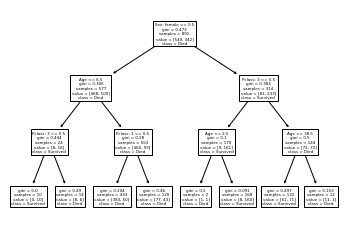

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(clf.steps[1][1], feature_names=feature_names, class_names=['Died', 'Survived'])
plt.savefig('titanic_tree.pdf');

In [16]:
import os
os.environ['PATH'] = os.environ['PATH'] + r';C:\Program Files\Graphviz\bin'

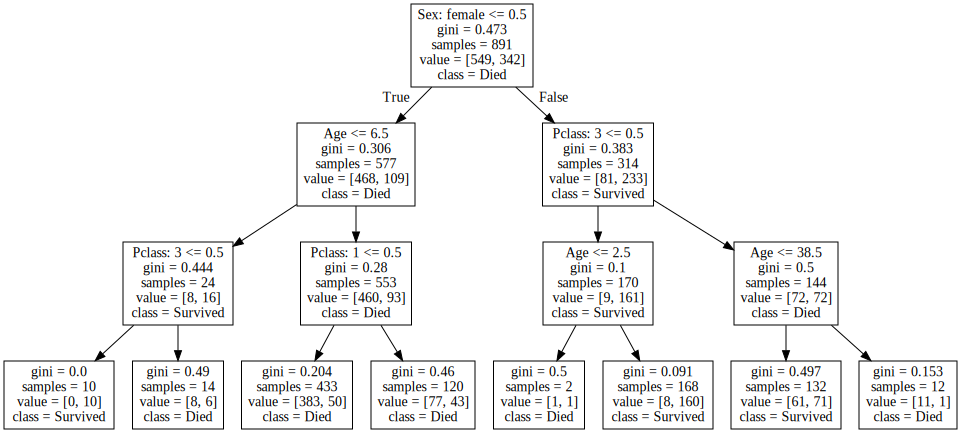

In [21]:
from sklearn.tree import export_graphviz
import graphviz 
import matplotlib.pyplot as plt
dot_data = export_graphviz(clf.steps[1][1], feature_names=feature_names, class_names=['Died', 'Survived'])
graph = graphviz.Source(dot_data)
graph.render('titanic_tree')
graph
# plt.savefig('titanic_tree.pdf');

In [63]:
!pip install graphviz

You should consider upgrading via the 'c:\users\roel\.virtualenvs\diagcovid-ckc2berq\scripts\python.exe -m pip install --upgrade pip' command.
